### Análisis del nacimiento de bebés en US

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
births = pd.read_csv("../../data/us-births.csv")

In [9]:
births.shape

(15547, 5)

In [10]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [11]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [12]:
births.pivot_table("births", index="year", columns="gender", aggfunc="sum")

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [13]:
births["decade"] = births["year"]//10*10

In [14]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [15]:
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [16]:
%matplotlib inline

In [17]:
import seaborn as sb

In [18]:
sb.set()

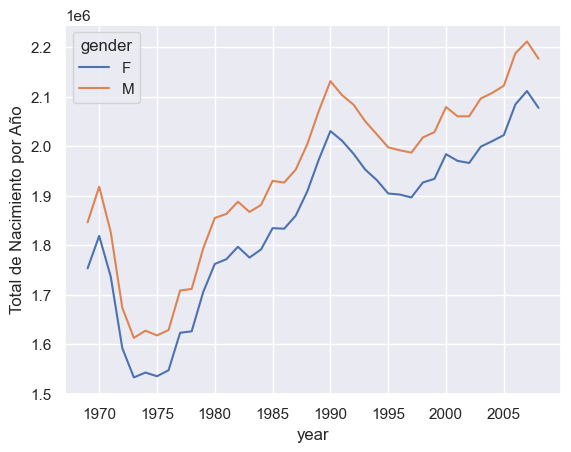

In [19]:
births.pivot_table("births", index="year", columns="gender", aggfunc="sum").plot()
plt.ylabel("Total de Nacimiento por Año")
plt.show()

In [20]:
quartiles = np.percentile(births["births"], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [21]:
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75*IQR

In [22]:
births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")

In [23]:
births.shape

(14610, 6)

In [24]:
births["day"] = births["day"].astype(int)

In [25]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [26]:
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day,
                              format="%Y%m%d")

In [27]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [28]:
births["dayofweek"] = births.index.dayofweek

In [29]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [30]:
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean")

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


AttributeError: 'Axes' object has no attribute 'set_xticketlabels'

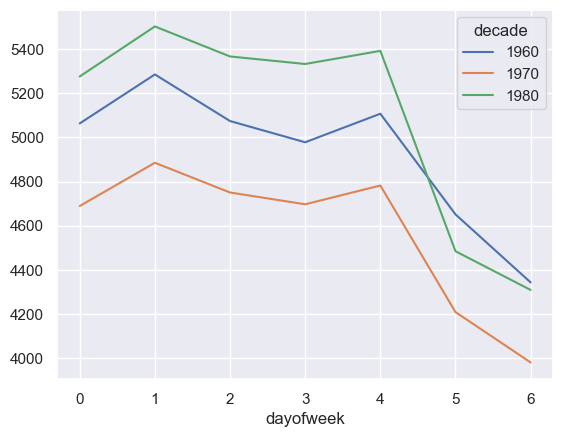

In [31]:
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean").plot()
plt.gca().set_xticketlabels(["Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"])

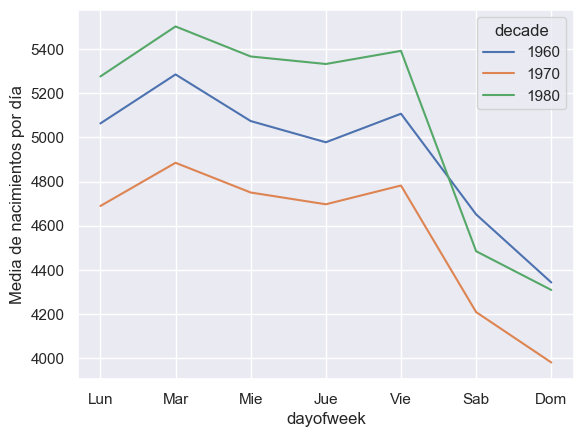

In [38]:
# Asumiendo que ya generaste la tabla pivote y el gráfico
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean").plot()

# Establecer los ticks y luego las etiquetas
plt.gca().set_xticks(range(7))  # Establecer los ticks en 0, 1, ..., 6
plt.gca().set_xticklabels(["Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"])

plt.ylabel("Media de nacimientos por día")
plt.show()

In [40]:
births_by_date = births.pivot_table("births", index=[births.index.month, births.index.day], aggfunc="mean")

In [42]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [44]:
births_by_date.index = [pd.to_datetime(f'2020-{month}-{day}') for (month, day) in births_by_date.index]

In [46]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625
